## IMPORT LIBRARY


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DOWNLOAD FILE

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## EDA and PREPROCESSING


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

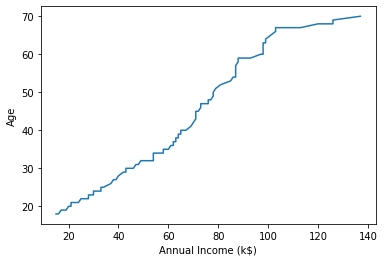

In [21]:
plt.plot(
    df['Annual Income (k$)'],
    df['Age'].sort_values()
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

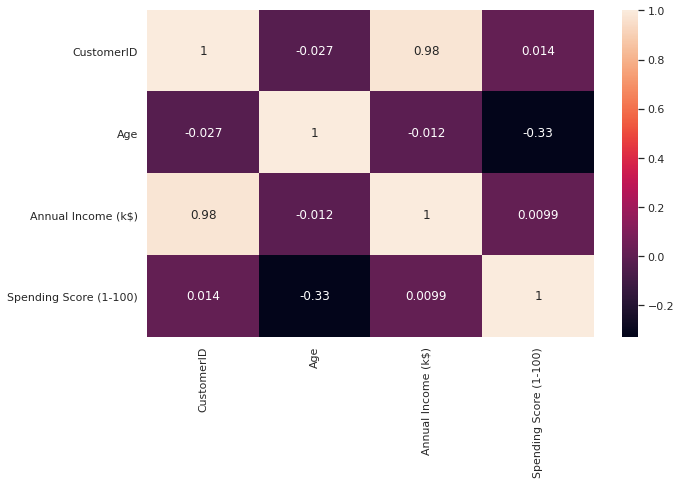

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

## SPLIT TRAINING AND TEST SET

In [33]:
X = df.drop('Spending Score (1-100)', axis=1)
y = df['Spending Score (1-100)']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state = 0)

In [39]:
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
object_cols

['Genre']

In [40]:
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]
low_cardinality_cols

['Genre']

In [41]:
from sklearn.preprocessing import OneHotEncoder

# Use as many lines of code as you need!
OH = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH.fit_transform(X_train[low_cardinality_cols])) # Your code here
OH_cols_valid = pd.DataFrame(OH.transform(X_valid[low_cardinality_cols])) # Your code here

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

## MODELLING

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(OH_X_train, y_train)
predictions = model.predict(OH_X_valid)

In [46]:
predictions

array([41.58170106, 46.36424337, 39.78324653, 42.66460311, 52.8196608 ,
       42.92462087, 60.49923873, 42.6097849 , 42.80240895, 48.71751014,
       57.10389889, 55.04992886, 51.44560677, 47.29124613, 38.3438652 ,
       59.98376413, 57.88024994, 43.16436647, 56.10286759, 37.23186315,
       55.36275814, 52.38925241, 58.87233608, 55.73235474, 32.08824096,
       47.06981999, 48.59626098, 50.76234976, 50.6427053 , 46.59855507,
       54.09261944, 43.45808484, 45.07869599, 61.10861205, 48.55626314,
       51.71733562, 47.5530399 , 56.06661275, 47.8855219 , 37.96533776])

In [50]:
np.array(y_valid)

array([29, 13, 46, 42, 69, 15, 76, 36, 15, 20, 55, 77, 32, 16, 51, 94, 92,
        9, 73, 47, 88, 97, 65, 73, 56, 91, 90, 97, 58, 28, 35, 41, 17, 54,
        5, 85, 75, 40, 44, 50])

## EVALUATION


In [51]:
coef_dict = {}
features = ['PassengerId', 'Pclass', 'Age', 'Sibsp', 'Parch']

for coef, feat in zip(model.coef_, features):
  coef_dict[feat] = coef

In [52]:
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index')
coef_df.columns = ['Coefficient']
print(coef_df)

             Coefficient
PassengerId     0.021976
Pclass         -0.490072
Age            -0.069355
Sibsp           2.042467
Parch          -2.042467


In [53]:
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index')
coef_df.columns = ['Coefficient']
print(coef_df)

             Coefficient
PassengerId     0.021976
Pclass         -0.490072
Age            -0.069355
Sibsp           2.042467
Parch          -2.042467


In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(f'MAE: {mean_absolute_error(y_valid, predictions)}')
print(f'MRE: {mean_squared_error(y_valid, predictions)}')
print(f'RMSE: {mean_squared_error(y_valid, predictions, squared=False)}')

MAE: 21.676711981403308
MRE: 640.9387264281064
RMSE: 25.316767693133862


## Plot Predicted VS Measure


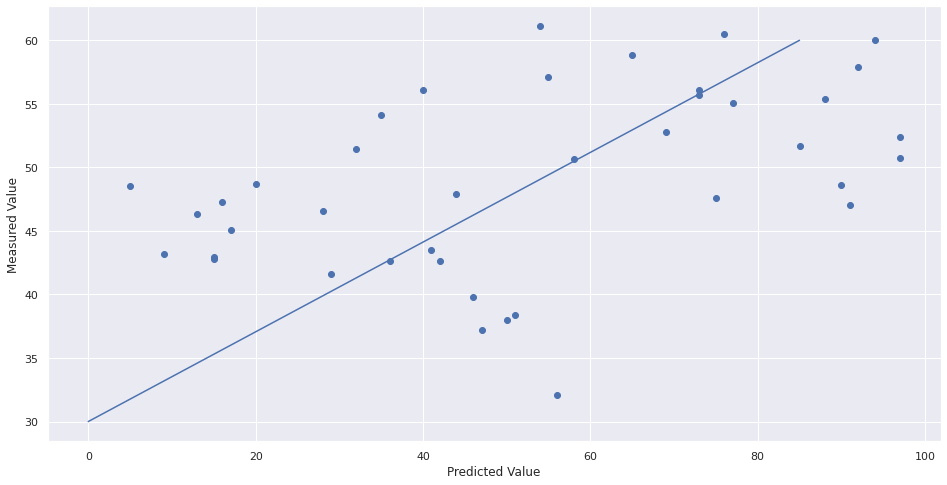

In [67]:
fig, ax = plt.subplots(figsize = (16,8))
plt.scatter(valid_y, predictions)
plt.plot([0,85],[30,60])
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Measured Value')
fig.show()